In [1]:
import sys
import os
import itertools
import pandas as pd
current_dir = os.getcwd()
print(current_dir)

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all


In [2]:
library_path = os.path.join('..', '..', '..','..','UCB-USACE-LSTMs')
sys.path.insert(0, library_path)
print(sys.path)

['..\\..\\..\\..\\UCB-USACE-LSTMs', 'F:\\Dino\\UCB-USACE-LSTMs\\UCB_training\\models\\warm_springs_all', 'C:\\Users\\Dino\\anaconda3\\python312.zip', 'C:\\Users\\Dino\\anaconda3\\DLLs', 'C:\\Users\\Dino\\anaconda3\\Lib', 'C:\\Users\\Dino\\anaconda3', '', 'C:\\Users\\Dino\\anaconda3\\Lib\\site-packages', 'C:\\Users\\Dino\\anaconda3\\Lib\\site-packages\\win32', 'C:\\Users\\Dino\\anaconda3\\Lib\\site-packages\\win32\\lib', 'C:\\Users\\Dino\\anaconda3\\Lib\\site-packages\\Pythonwin']


In [3]:
from pathlib import Path
from neuralhydrology.evaluation.metrics import *
from UCB_training.UCB_train import UCB_trainer
from UCB_training.UCB_utils import combinedPlot
from UCB_training.UCB_utils import fancyCombinedPlot

In [4]:
current_path = os.getcwd()
library_path = current_path.split('UCB-USACE-LSTMs')[0] + 'UCB-USACE-LSTMs'

target_path = os.path.join(library_path, 'UCB_training', 'models', 'warm_springs_all')

if os.path.exists(target_path):
    os.chdir(target_path)
    print("Current Working Directory:", os.getcwd())
    print("Train Basin File Exists:", os.path.exists("warm_springs")) 
else:
    print(f"Error: The target path '{target_path}' does not exist.")

Current Working Directory: F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all
Train Basin File Exists: False


In [5]:
path_to_csv = Path(library_path +'/russian_river_data')
path_to_yaml = Path("warm_springs_dam_nlayer.yaml")
path_to_physics_data = Path(library_path + "/russian_river_data/Warm_springs_daily.csv")

In [6]:
features_with_physics = [
    #from daily.csv
    "DRY CREEK 20 PRECIP-INC SCREENED",
    "DRY CREEK 20 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "DRY CREEK 30 PRECIP-INC SCREENED",
    "DRY CREEK 30 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "UKIAH CA HUMIDITY USAF-NOAA",
    "UKIAH CA SOLAR RADIATION USAF-NOAA",
    "UKIAH CA TEMPERATURE USAF-NOAA",
    "UKIAH CA WINDSPEED USAF-NOAA",
    "SANTA ROSA CA HUMIDITY USAF-NOAA",
    "SANTA ROSA CA SOLAR RADIATION USAF-NOAA",
    "SANTA ROSA CA TEMPERATURE USAF-NOAA",
    "SANTA ROSA CA WINDSPEED USAF-NOAA",
    #from Warm_Spring_Inflow.csv
    'Dry Creek 20 ET-POTENTIAL', 
    'Dry Creek 20 FLOW',
    'Dry Creek 20 FLOW-BASE', 
    'Dry Creek 20 INFILTRATION',
    'Dry Creek 20 PERC-SOIL',
    'Dry Creek 20 SATURATION FRACTION',
    'Dry Creek 30 ET-POTENTIAL', 
    'Dry Creek 30 FLOW',
    'Dry Creek 30 FLOW-BASE', 
    'Dry Creek 30 INFILTRATION',
    'Dry Creek 30 PERC-SOIL',
    'Dry Creek 30 SATURATION FRACTION',
    'Warm Springs Dam Inflow FLOW',
]


In [7]:
hyperparam_space = {
    "hidden_size": [64, 128, 256],
    "seq_length": [90, 180],
    "num_layers": [1, 2],
    "epochs": [16, 32]
}
fixed_dropout = 0.4
search_results = []

In [8]:
approaches = [
    {
        "name": "NoPhysics",
        "physics_informed": False,
        "input_features": None,
        "physics_data_file": None
    },
    {
        "name": "Physics",
        "physics_informed": True,
        "input_features": features_with_physics,
        "physics_data_file": path_to_physics_data
    }
]

Approach: NoPhysics | Hyperparams: {'hidden_size': 64, 'seq_length': 90, 'num_layers': 1, 'epochs': 16, 'output_dropout': 0.4, 'save_weights_every': 16}
2025-02-12 21:44:29,141: Logging to F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1202_214429\output.log initialized.
2025-02-12 21:44:29,141: ### Folder structure created at F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1202_214429
2025-02-12 21:44:29,141: ### Run configurations for testing_run
2025-02-12 21:44:29,141: experiment_name: testing_run
2025-02-12 21:44:29,141: train_basin_file: warm springs
2025-02-12 21:44:29,155: validation_basin_file: warm springs
2025-02-12 21:44:29,157: test_basin_file: warm springs
2025-02-12 21:44:29,158: train_start_date: 1994-10-01 00:00:00
2025-02-12 21:44:29,160: train_end_date: 2002-09-30 00:00:00
2025-02-12 21:44:29,161: validation_start_date: 2002-10-01 00:00:00
2025-02-12 21:44:29,162: validation_end_date: 2005-09-30 00:00:00
20

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature

# Validation: 100%|██████████| 1/1 [00:00<00:00,  2.66it/s]
2025-02-12 21:44:53,048: Stored metrics at F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1202_214429\validation\model_epoch016\validation_metrics.csv
2025-02-12 21:44:53,051: Stored results at F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1202_214429\validation\model_epoch016\validation_results.p
got predictions


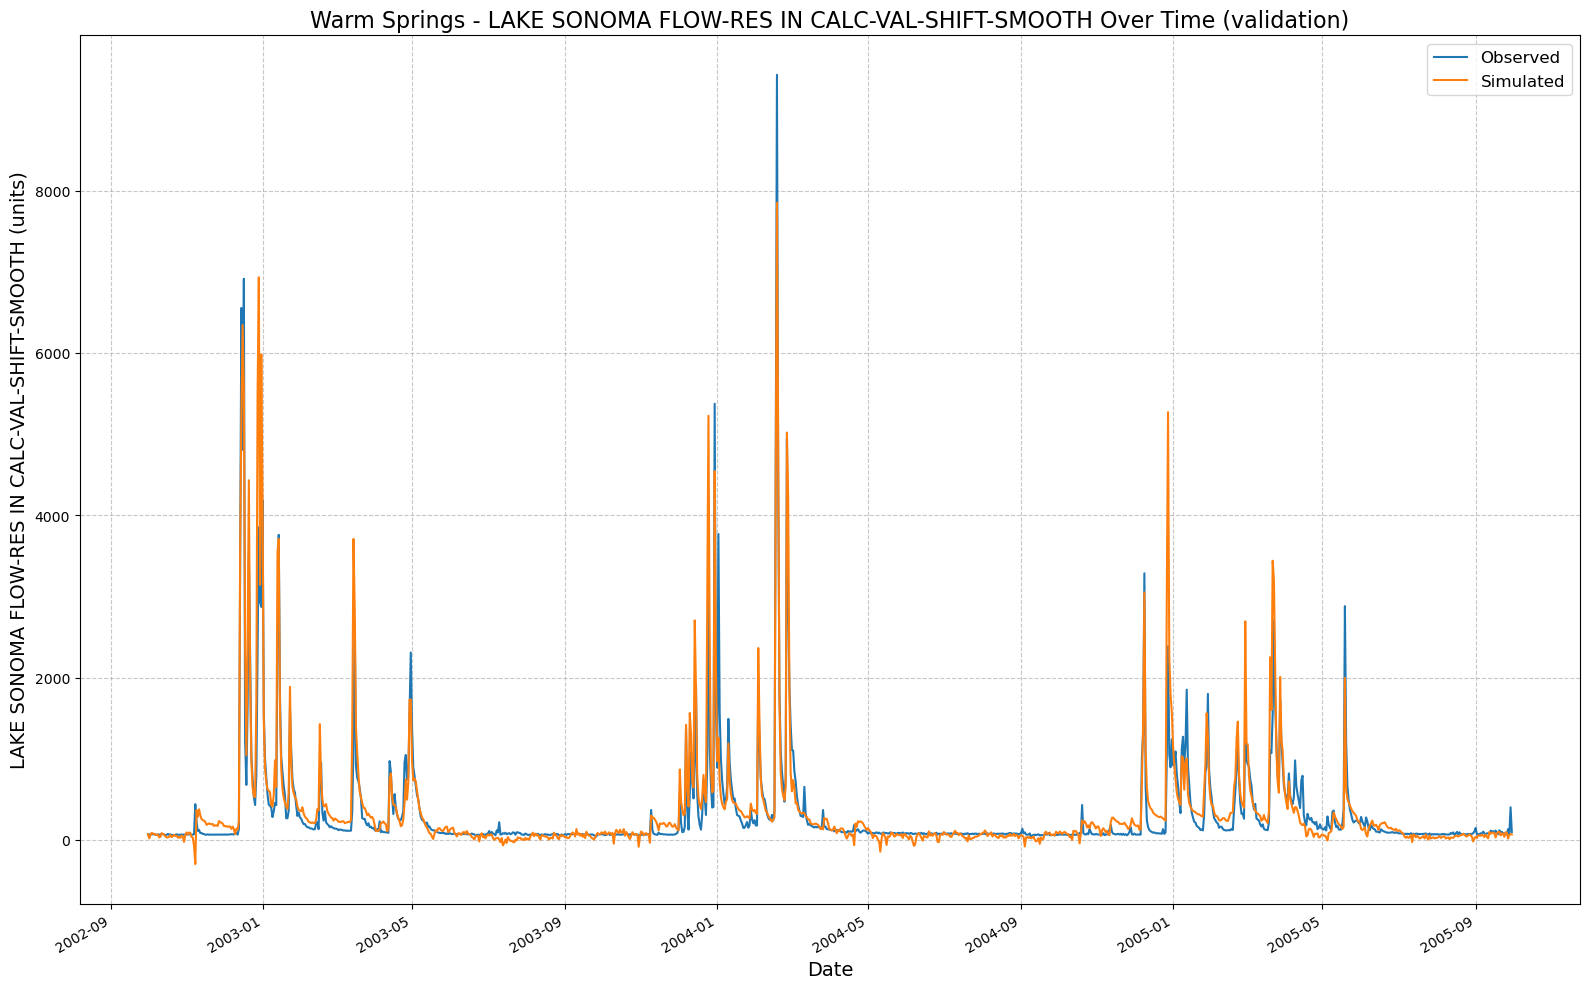

[INFO] CSV output saved at: F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1202_214429\results_output_validation.csv
NoPhysics metrics: {'NSE': 0.7951495200395584, 'MSE': 100442.0, 'RMSE': 316.92585883767833, 'KGE': 0.8149438730068534, 'Alpha-NSE': 1.1156866110340624, 'Beta-KGE': 1.1171574592590332, 'Beta-NSE': 0.05445699897555282, 'Pearson-r': 0.9155221454751299, 'FHV': 13.794837892055511, 'FMS': 14.02069633815717, 'FLV': -2349.8862098059517, 'Peak-Timing': 0.2, 'Peak-MAPE': 19.910000562667847}
Approach: NoPhysics | Hyperparams: {'hidden_size': 64, 'seq_length': 90, 'num_layers': 1, 'epochs': 32, 'output_dropout': 0.4, 'save_weights_every': 32}
2025-02-12 21:44:54,223: Logging to F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1202_214454\output.log initialized.
2025-02-12 21:44:54,223: ### Folder structure created at F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1202_214454
2025-02-12 21:44:5

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  2.86it/s]
2025-02-12 21:44:54,704: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 200.88it/s]
2025-02-12 21:44:54,768: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 12/12 [00:00<00:00, 12.92it/s, Loss: 0.0000]
2025-02-12 21:44:56,145: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 12/12 [00:00<00:00, 14.27it/s, Loss: 0.0000]
2025-02-12 21:44:56,995: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 12/12 [00:00<00:00, 14.02it/s, Loss: 0.0000]
2025-02-12 21:44:57,858: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 12/12 [00:00<00:00, 14.50it/s, Loss: 0.0000]
2025-02-12 21:44:58,693: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 12/12 [00:00<00:00, 14.24it/s, Loss: 0.0000]
2025-02-12 21:44:59,544: Epoch 5 averag

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature

# Validation: 100%|██████████| 1/1 [00:00<00:00,  1.72it/s]
2025-02-12 21:45:27,778: Stored metrics at F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1202_214454\validation\model_epoch032\validation_metrics.csv
2025-02-12 21:45:27,781: Stored results at F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1202_214454\validation\model_epoch032\validation_results.p
got predictions


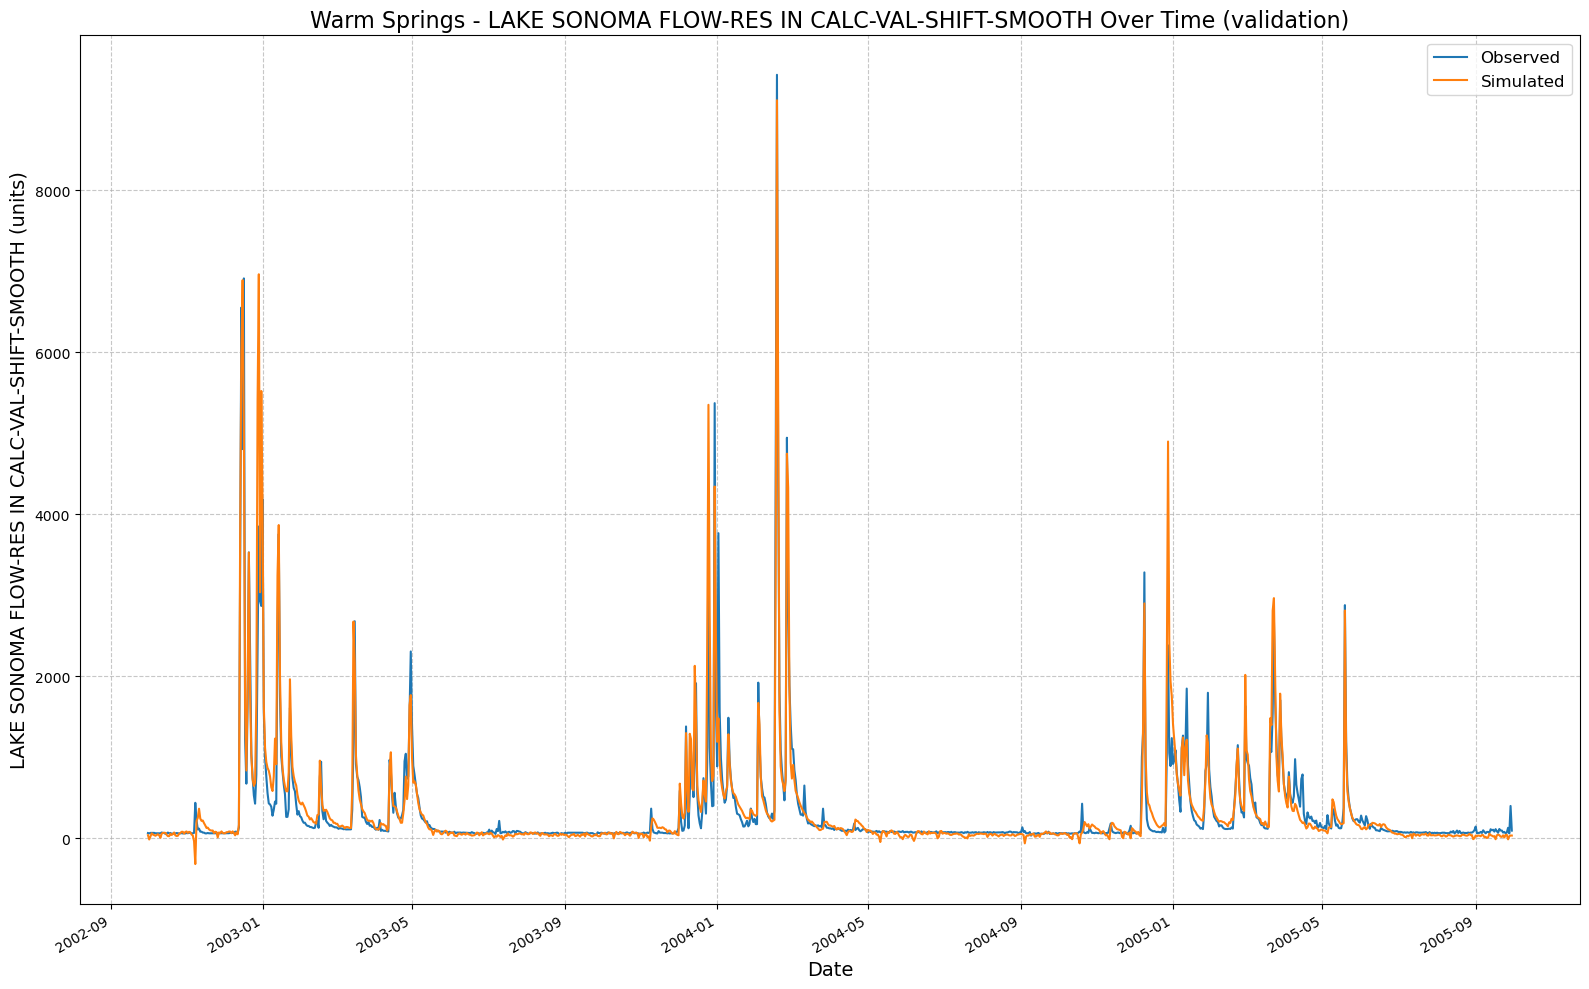

[INFO] CSV output saved at: F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1202_214454\results_output_validation.csv
NoPhysics metrics: {'NSE': 0.84177166223526, 'MSE': 77582.296875, 'RMSE': 278.53598847366203, 'KGE': 0.8573178264275366, 'Alpha-NSE': 1.107290118856967, 'Beta-KGE': 1.067201852798462, 'Beta-NSE': 0.03123666107098095, 'Pearson-r': 0.9341900916922512, 'FHV': 11.826587468385696, 'FMS': 24.019616842321064, 'FLV': -2559.4676126661884, 'Peak-Timing': 0.2, 'Peak-MAPE': 13.57943296432495}
Approach: NoPhysics | Hyperparams: {'hidden_size': 64, 'seq_length': 90, 'num_layers': 2, 'epochs': 16, 'output_dropout': 0.4, 'save_weights_every': 16}
2025-02-12 21:45:28,520: Logging to F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1202_214528\output.log initialized.
2025-02-12 21:45:28,522: ### Folder structure created at F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1202_214528
2025-02-12 21:45:2

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  4.02it/s]
2025-02-12 21:45:28,865: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 201.00it/s]
2025-02-12 21:45:28,898: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 12/12 [00:00<00:00, 13.34it/s, Loss: 0.0000]
2025-02-12 21:45:30,113: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 12/12 [00:00<00:00, 14.02it/s, Loss: 0.0000]
2025-02-12 21:45:30,976: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 12/12 [00:00<00:00, 13.95it/s, Loss: 0.0000]
2025-02-12 21:45:31,846: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 12/12 [00:00<00:00, 13.57it/s, Loss: 0.0000]
2025-02-12 21:45:32,738: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 12/12 [00:00<00:00, 13.72it/s, Loss: 0.0000]
2025-02-12 21:45:33,619: Epoch 5 averag

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature

# Validation: 100%|██████████| 1/1 [00:00<00:00,  2.47it/s]
2025-02-12 21:45:46,252: Stored metrics at F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1202_214528\validation\model_epoch016\validation_metrics.csv
2025-02-12 21:45:46,255: Stored results at F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1202_214528\validation\model_epoch016\validation_results.p
got predictions


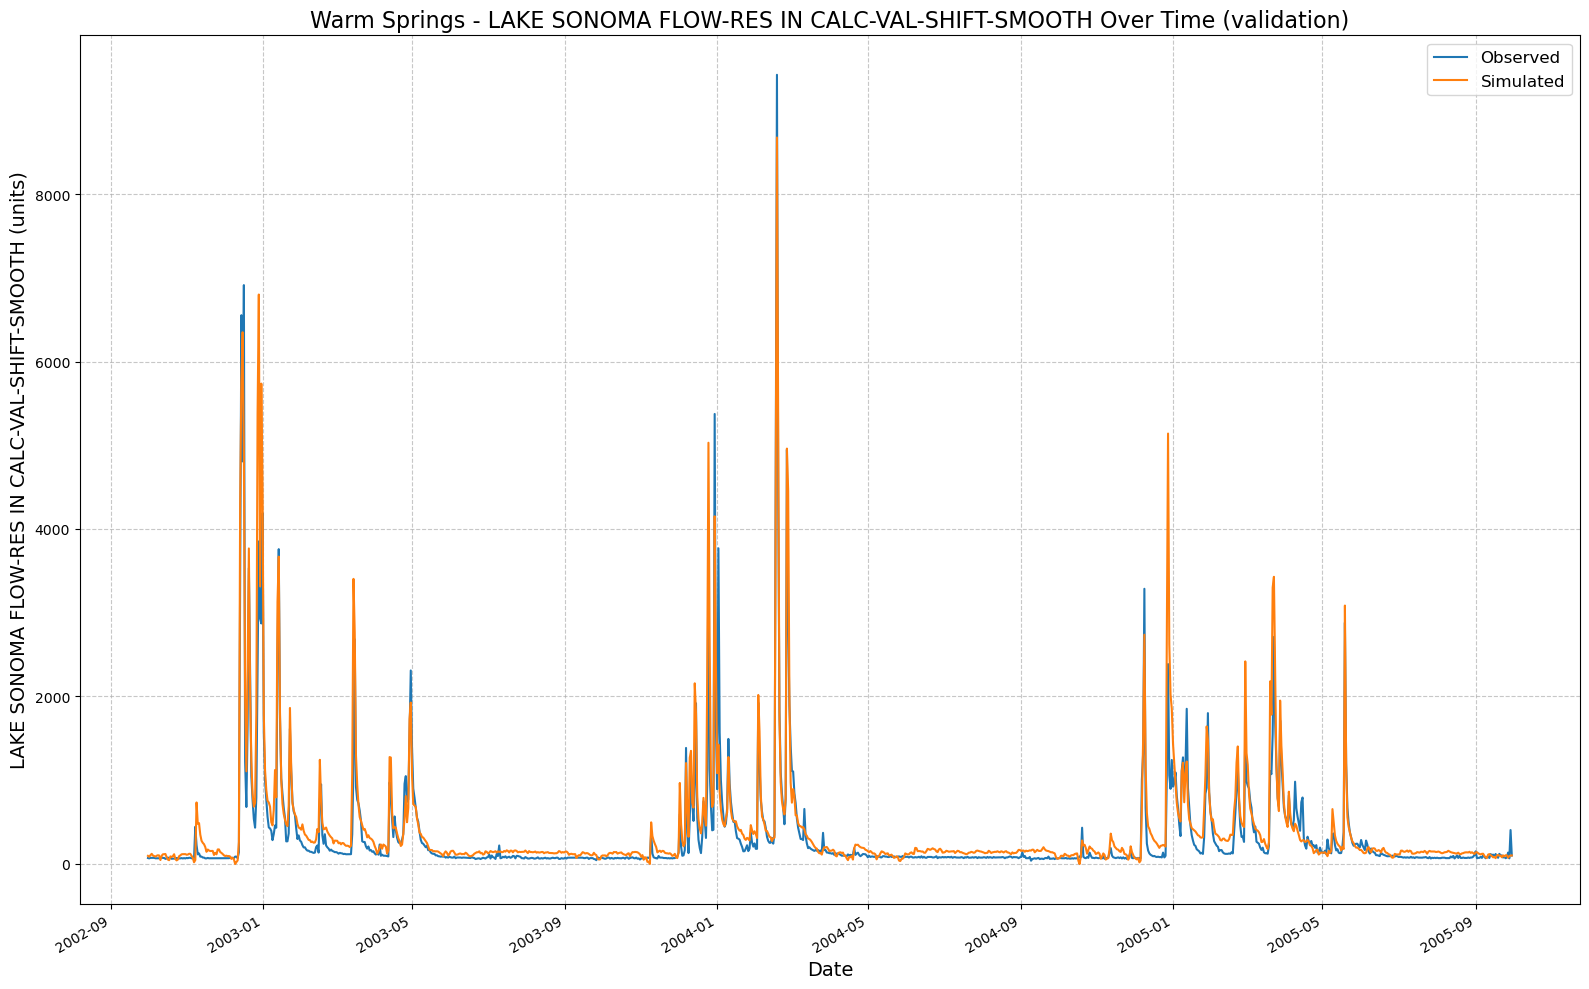

[INFO] CSV output saved at: F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1202_214528\results_output_validation.csv
NoPhysics metrics: {'NSE': 0.818582072854042, 'MSE': 88952.5859375, 'RMSE': 298.2492010676642, 'KGE': 0.7110334803858938, 'Alpha-NSE': 1.1098346319281476, 'Beta-KGE': 1.2579989433288574, 'Beta-NSE': 0.11992273020185872, 'Pearson-r': 0.9301820343443676, 'FHV': 13.7473464012146, 'FMS': -22.14186080325019, 'FLV': -2827.6462941301775, 'Peak-Timing': 0.2, 'Peak-MAPE': 15.445371866226196}
Approach: NoPhysics | Hyperparams: {'hidden_size': 64, 'seq_length': 90, 'num_layers': 2, 'epochs': 32, 'output_dropout': 0.4, 'save_weights_every': 32}
2025-02-12 21:45:47,073: Logging to F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1202_214547\output.log initialized.
2025-02-12 21:45:47,073: ### Folder structure created at F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1202_214547
2025-02-12 21:45

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


2025-02-12 21:45:47,167: img_log_dir: F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1202_214547\img_log
2025-02-12 21:45:47,175: ### Device cpu will be used for training
2025-02-12 21:45:47,178: Loading basin data into xarray data set.
100%|██████████| 1/1 [00:00<00:00,  3.17it/s]
2025-02-12 21:45:47,504: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 452.56it/s]
2025-02-12 21:45:47,518: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 12/12 [00:00<00:00, 12.97it/s, Loss: 0.0000]
2025-02-12 21:45:49,146: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 12/12 [00:00<00:00, 13.67it/s, Loss: 0.0000]
2025-02-12 21:45:50,032: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 12/12 [00:00<00:00, 13.99it/s, Loss: 0.0000]
2025-02-12 21:45:50,899: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature

# Validation: 100%|██████████| 1/1 [00:00<00:00,  2.34it/s]
2025-02-12 21:46:26,339: Stored metrics at F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1202_214547\validation\model_epoch032\validation_metrics.csv
2025-02-12 21:46:26,343: Stored results at F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1202_214547\validation\model_epoch032\validation_results.p
got predictions


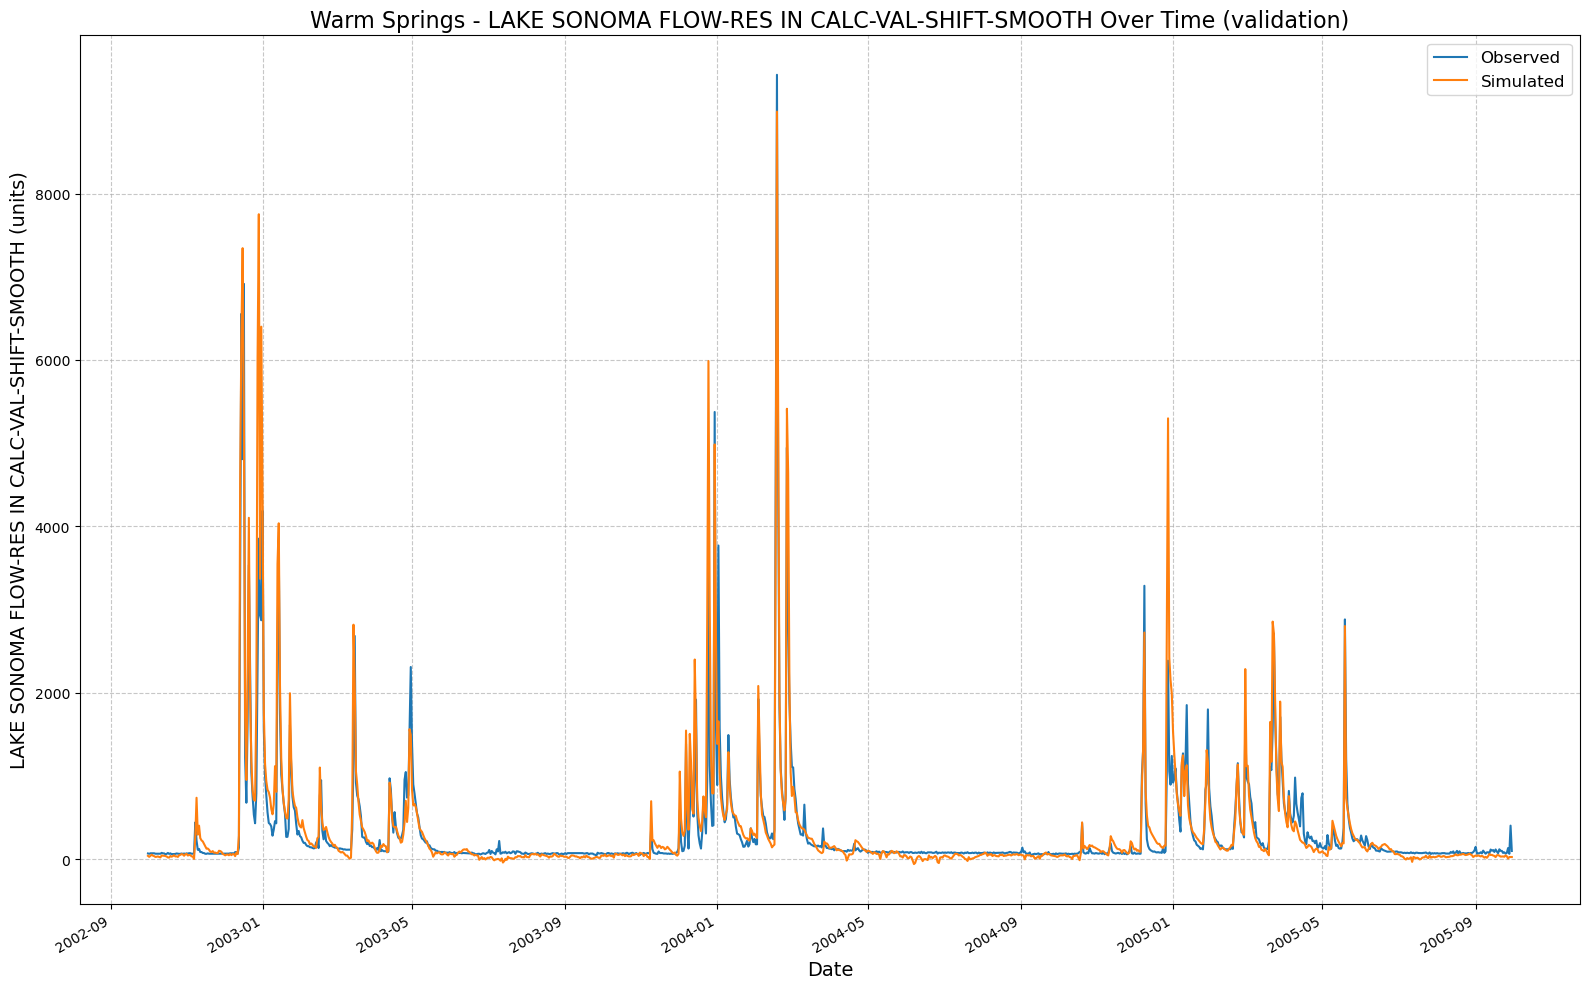

[INFO] CSV output saved at: F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1202_214547\results_output_validation.csv
NoPhysics metrics: {'NSE': 0.7850597649812698, 'MSE': 105389.1953125, 'RMSE': 324.6370208594516, 'KGE': 0.7770910360776805, 'Alpha-NSE': 1.192331960982622, 'Beta-KGE': 1.0850037336349487, 'Beta-NSE': 0.03951129694246142, 'Pearson-r': 0.9260325189720522, 'FHV': 21.361880004405975, 'FMS': 36.454437017431715, 'FLV': -2346.2753716391417, 'Peak-Timing': 0.4, 'Peak-MAPE': 16.54892325401306}
Approach: NoPhysics | Hyperparams: {'hidden_size': 64, 'seq_length': 180, 'num_layers': 1, 'epochs': 16, 'output_dropout': 0.4, 'save_weights_every': 16}
2025-02-12 21:46:27,123: Logging to F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1202_214627\output.log initialized.
2025-02-12 21:46:27,125: ### Folder structure created at F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1202_214627
2025-02-12 21

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  2.52it/s]
2025-02-12 21:46:27,615: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 502.97it/s]
2025-02-12 21:46:27,632: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:02<00:00,  4.90it/s, Loss: 0.0000]
2025-02-12 21:46:30,374: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:02<00:00,  5.01it/s, Loss: 0.0000]
2025-02-12 21:46:32,579: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:02<00:00,  5.25it/s, Loss: 0.0000]
2025-02-12 21:46:34,683: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:02<00:00,  5.05it/s, Loss: 0.0000]
2025-02-12 21:46:36,875: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:02<00:00,  3.76it/s, Loss: 0.0000]
2025-02-12 21:46:39,813: Epoch 5 averag

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature

# Validation: 100%|██████████| 1/1 [00:00<00:00,  1.97it/s]
2025-02-12 21:47:10,814: Stored metrics at F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1202_214627\validation\model_epoch016\validation_metrics.csv
2025-02-12 21:47:10,817: Stored results at F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1202_214627\validation\model_epoch016\validation_results.p
got predictions


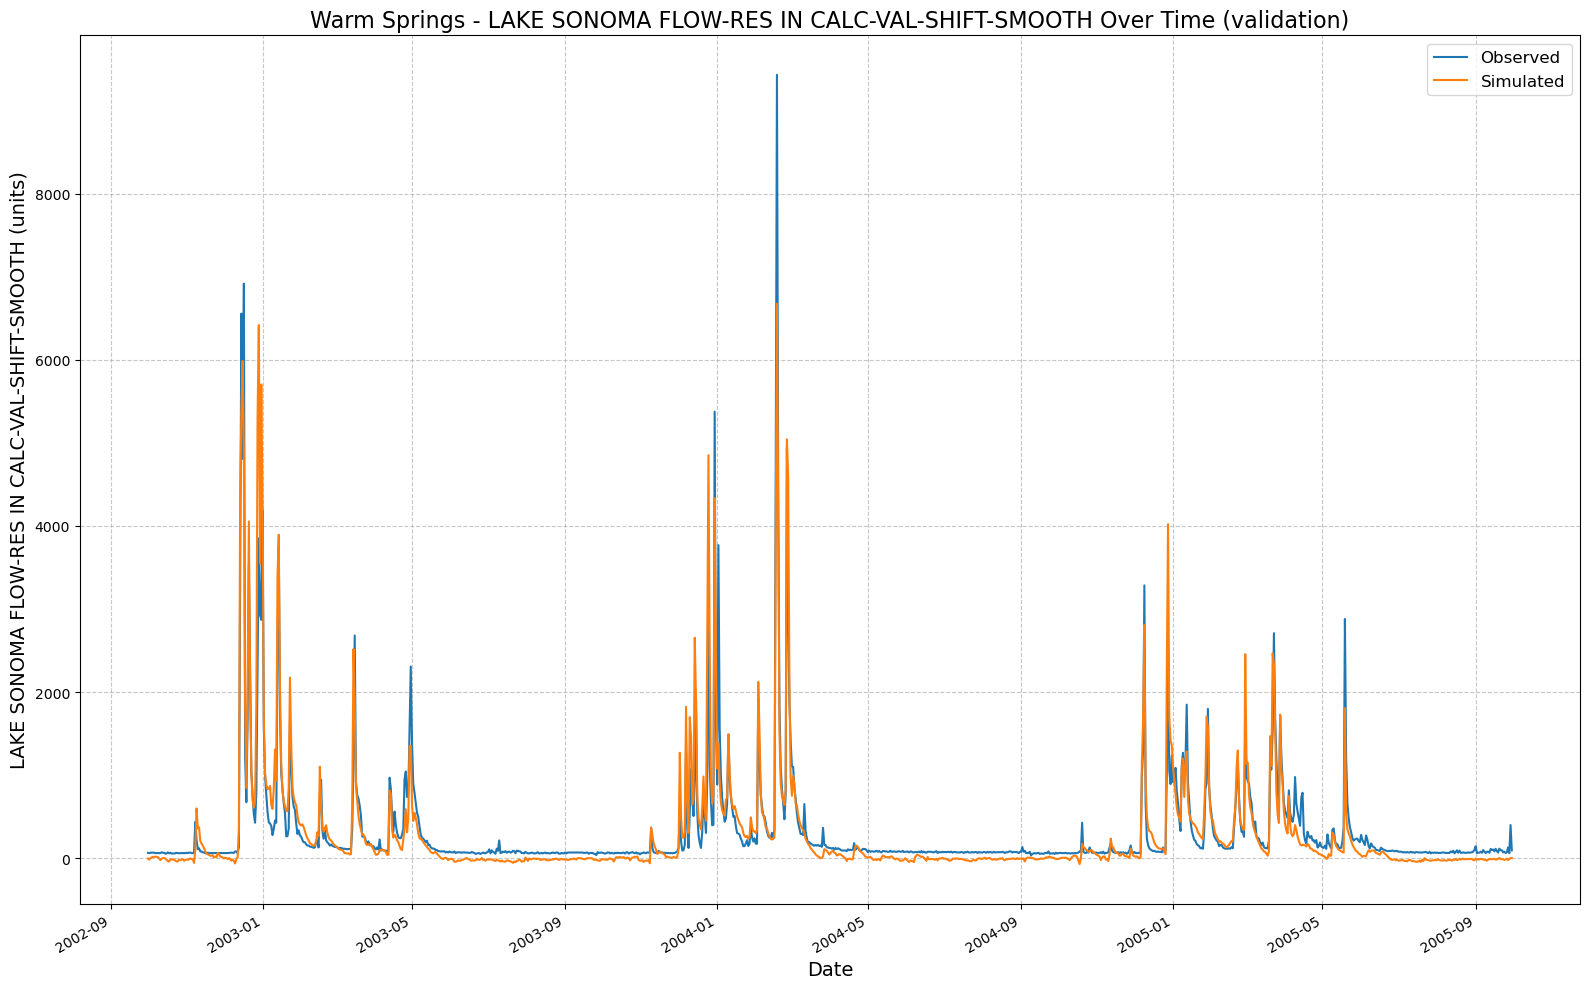

[INFO] CSV output saved at: F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1202_214627\results_output_validation.csv
NoPhysics metrics: {'NSE': 0.8245159536600113, 'MSE': 86043.09375, 'RMSE': 293.33103100422227, 'KGE': 0.8668261906237112, 'Alpha-NSE': 1.070328346958199, 'Beta-KGE': 0.919084370136261, 'Beta-NSE': -0.037611105624575016, 'Pearson-r': 0.9209946333362495, 'FHV': 6.764006614685059, 'FMS': 1140.9924153349896, 'FLV': 99.9999995110746, 'Peak-Timing': 0.2, 'Peak-MAPE': 30.27639865875244}
Approach: NoPhysics | Hyperparams: {'hidden_size': 64, 'seq_length': 180, 'num_layers': 1, 'epochs': 32, 'output_dropout': 0.4, 'save_weights_every': 32}
2025-02-12 21:47:11,563: Logging to F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1202_214711\output.log initialized.
2025-02-12 21:47:11,566: ### Folder structure created at F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1202_214711
2025-02-12 21:47:1

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.18it/s]
2025-02-12 21:47:11,979: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.18it/s]
2025-02-12 21:47:11,999: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:02<00:00,  5.31it/s, Loss: 0.0000]
2025-02-12 21:47:14,488: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:02<00:00,  4.71it/s, Loss: 0.0000]
2025-02-12 21:47:16,832: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:02<00:00,  5.01it/s, Loss: 0.0000]
2025-02-12 21:47:19,035: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:02<00:00,  5.07it/s, Loss: 0.0000]
2025-02-12 21:47:21,213: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:02<00:00,  4.85it/s, Loss: 0.0000]
2025-02-12 21:47:23,488: Epoch 5 averag

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature

# Validation: 100%|██████████| 1/1 [00:00<00:00,  1.94it/s]
2025-02-12 21:48:24,221: Stored metrics at F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1202_214711\validation\model_epoch032\validation_metrics.csv
2025-02-12 21:48:24,223: Stored results at F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1202_214711\validation\model_epoch032\validation_results.p
got predictions


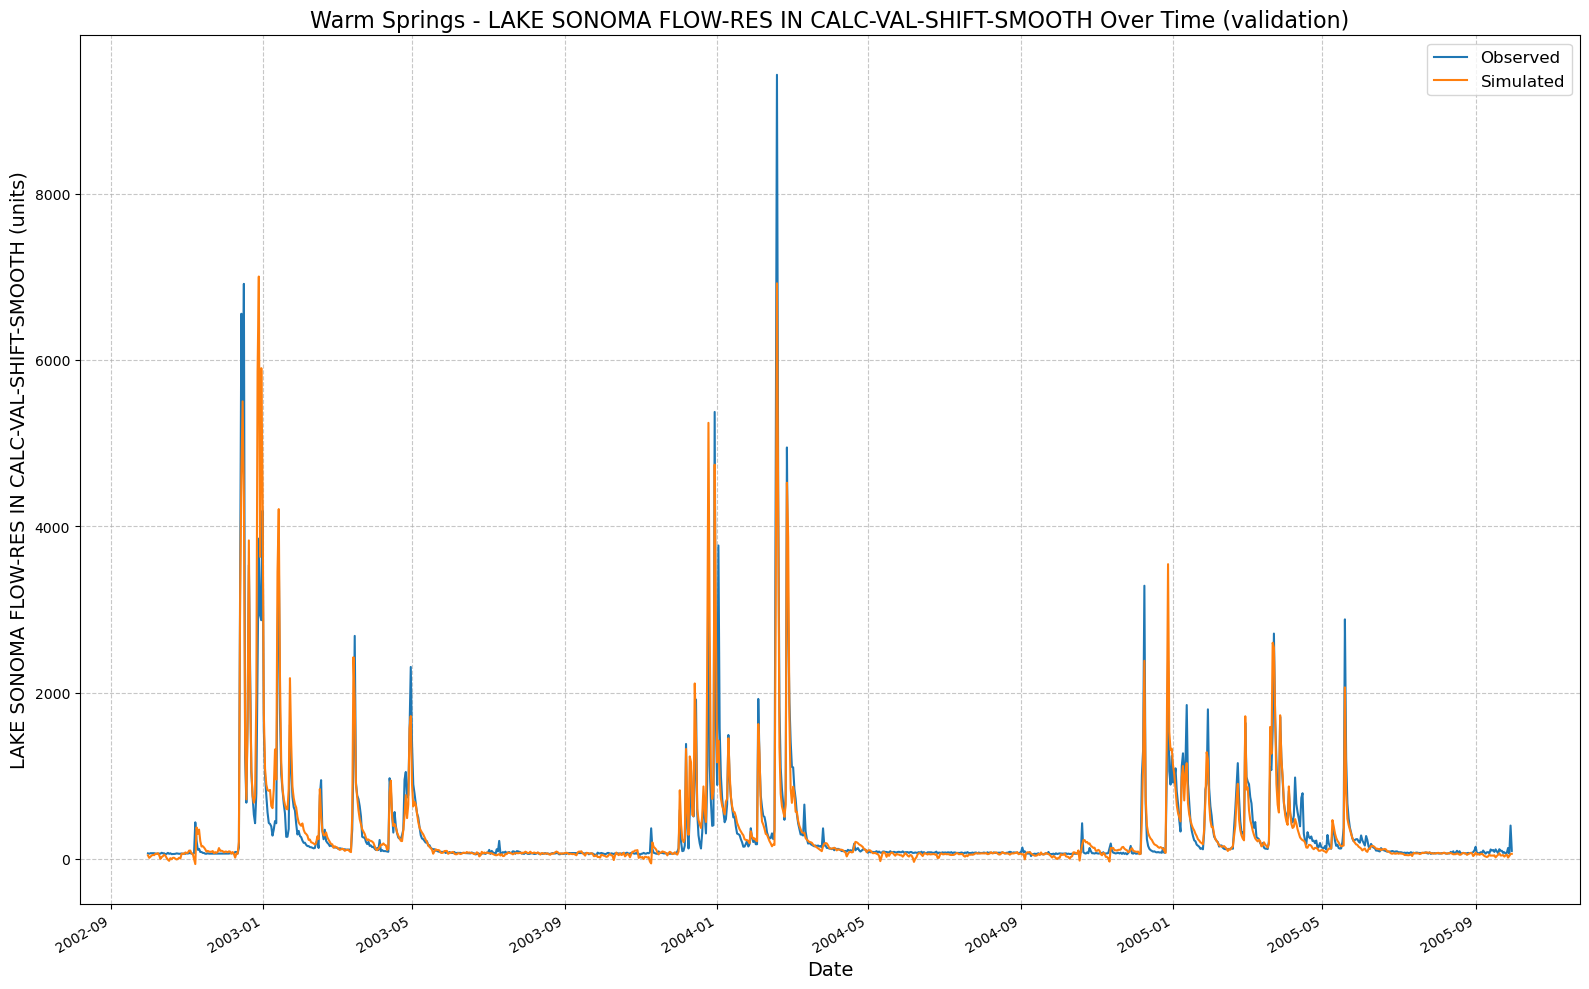

[INFO] CSV output saved at: F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1202_214711\results_output_validation.csv
NoPhysics metrics: {'NSE': 0.8301657438278198, 'MSE': 83272.8984375, 'RMSE': 288.5704392994889, 'KGE': 0.9142714516624583, 'Alpha-NSE': 1.0173003703019623, 'Beta-KGE': 1.0104303359985352, 'Beta-NSE': 0.004848189967530263, 'Pearson-r': 0.9166855998135084, 'FHV': 4.1228145360946655, 'FMS': 8.207500832673784, 'FLV': -2586.4530475768374, 'Peak-Timing': 0.2, 'Peak-MAPE': 29.041106700897217}
Approach: NoPhysics | Hyperparams: {'hidden_size': 64, 'seq_length': 180, 'num_layers': 2, 'epochs': 16, 'output_dropout': 0.4, 'save_weights_every': 16}
2025-02-12 21:48:24,942: Logging to F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1202_214824\output.log initialized.
2025-02-12 21:48:24,943: ### Folder structure created at F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1202_214824
2025-02-12 2

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  4.34it/s]
2025-02-12 21:48:25,240: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 502.25it/s]
2025-02-12 21:48:25,254: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:02<00:00,  5.36it/s, Loss: 0.0000]
2025-02-12 21:48:27,525: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:02<00:00,  5.39it/s, Loss: 0.0000]
2025-02-12 21:48:29,573: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:02<00:00,  5.19it/s, Loss: 0.0000]
2025-02-12 21:48:31,699: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:02<00:00,  5.37it/s, Loss: 0.0000]
2025-02-12 21:48:33,755: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:02<00:00,  5.43it/s, Loss: 0.0000]
2025-02-12 21:48:35,796: Epoch 5 averag

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature

# Validation: 100%|██████████| 1/1 [00:00<00:00,  1.55it/s]
2025-02-12 21:49:11,251: Stored metrics at F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1202_214824\validation\model_epoch016\validation_metrics.csv
2025-02-12 21:49:11,255: Stored results at F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1202_214824\validation\model_epoch016\validation_results.p
got predictions


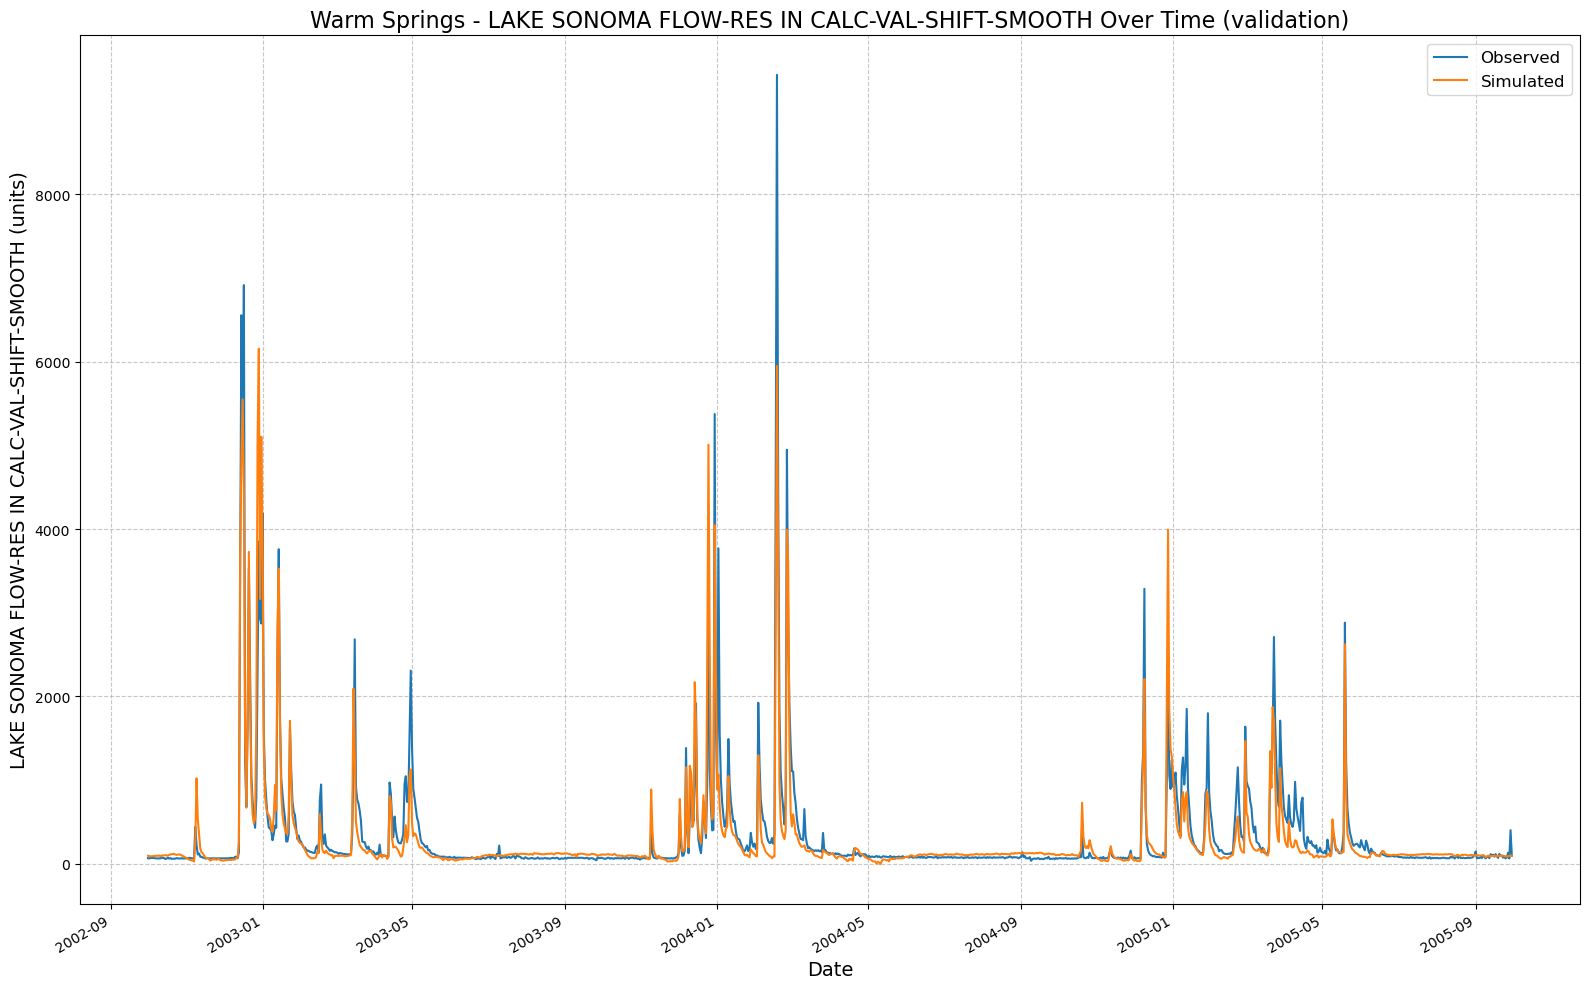

[INFO] CSV output saved at: F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1202_214824\results_output_validation.csv
NoPhysics metrics: {'NSE': 0.8117818087339401, 'MSE': 92286.8828125, 'RMSE': 303.78756197793876, 'KGE': 0.8182724694243709, 'Alpha-NSE': 0.9083525524319878, 'Beta-KGE': 0.876782238483429, 'Beta-NSE': -0.05727390185721039, 'Pearson-r': 0.9028247769736026, 'FHV': -4.017753526568413, 'FMS': -44.84607713408636, 'FLV': -2784.324591787022, 'Peak-Timing': 0.2, 'Peak-MAPE': 33.10102701187134}
Approach: NoPhysics | Hyperparams: {'hidden_size': 64, 'seq_length': 180, 'num_layers': 2, 'epochs': 32, 'output_dropout': 0.4, 'save_weights_every': 32}
2025-02-12 21:49:12,038: Logging to F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1202_214912\output.log initialized.
2025-02-12 21:49:12,038: ### Folder structure created at F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1202_214912
2025-02-12 21

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.16it/s]
2025-02-12 21:49:12,504: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 335.09it/s]
2025-02-12 21:49:12,534: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:02<00:00,  3.83it/s, Loss: 0.0000]
2025-02-12 21:49:15,854: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:02<00:00,  3.78it/s, Loss: 0.0000]
2025-02-12 21:49:18,774: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:02<00:00,  3.86it/s, Loss: 0.0000]
2025-02-12 21:49:21,640: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:02<00:00,  3.85it/s, Loss: 0.0000]
2025-02-12 21:49:24,503: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:02<00:00,  3.82it/s, Loss: 0.0000]
2025-02-12 21:49:27,398: Epoch 5 averag

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature

# Validation: 100%|██████████| 1/1 [00:00<00:00,  1.73it/s]
2025-02-12 21:50:41,451: Stored metrics at F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1202_214912\validation\model_epoch032\validation_metrics.csv
2025-02-12 21:50:41,454: Stored results at F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1202_214912\validation\model_epoch032\validation_results.p
got predictions


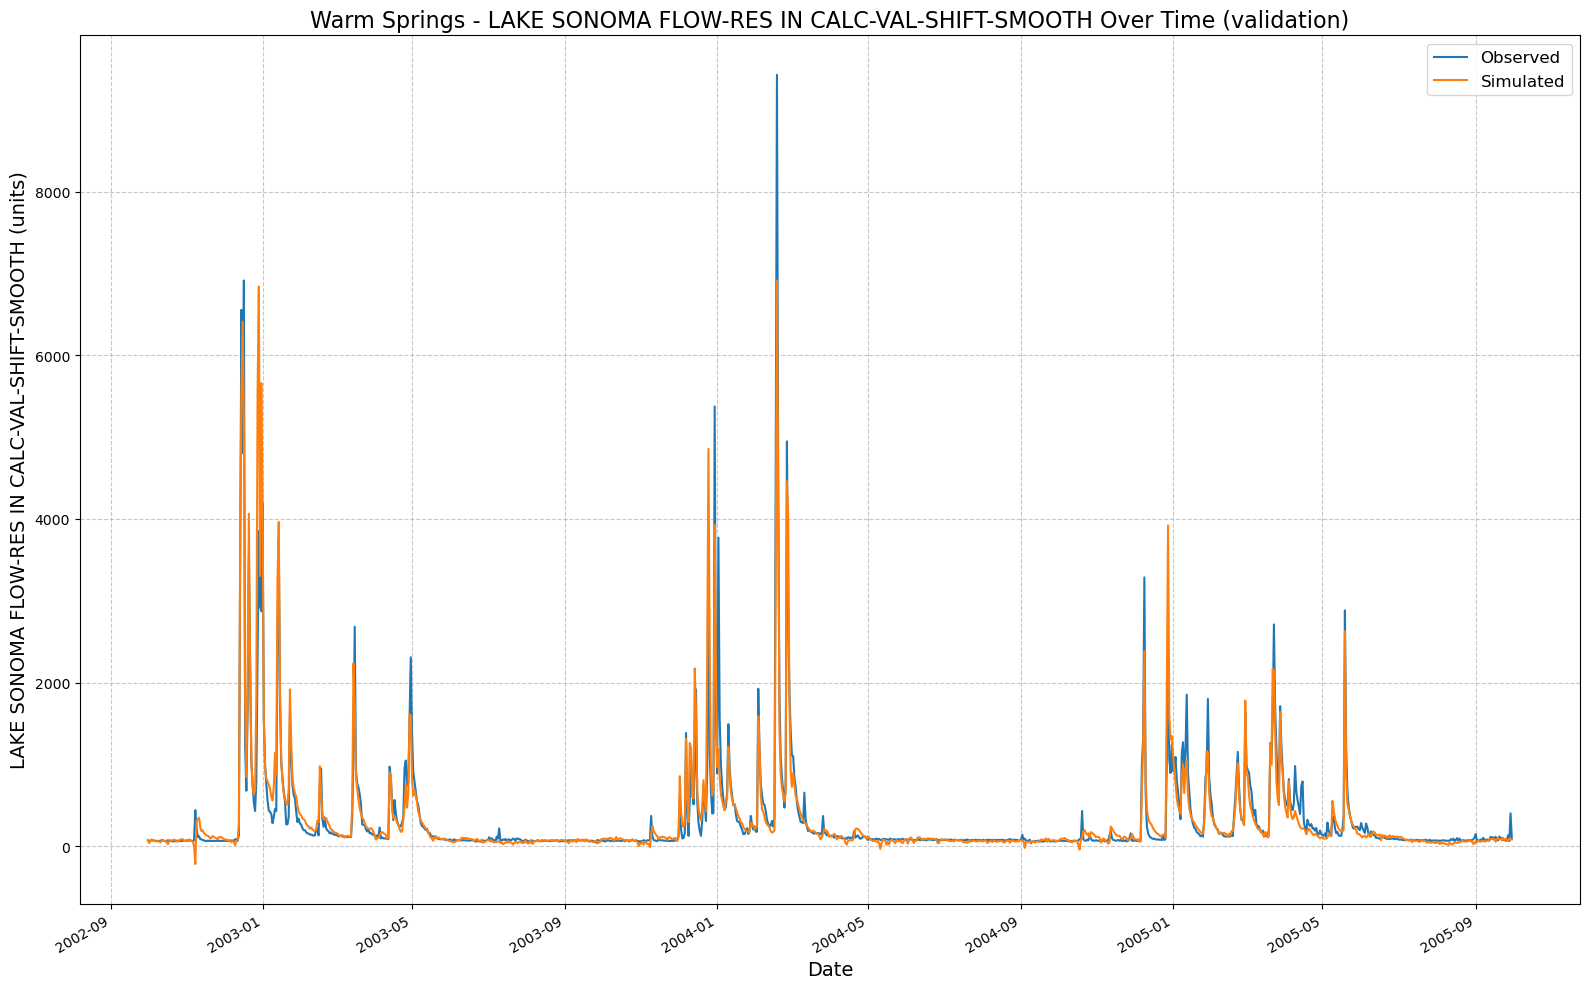

[INFO] CSV output saved at: F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1202_214912\results_output_validation.csv
NoPhysics metrics: {'NSE': 0.8487499058246613, 'MSE': 74160.734375, 'RMSE': 272.32468557771256, 'KGE': 0.9237118460392754, 'Alpha-NSE': 1.011957520438606, 'Beta-KGE': 1.0102148056030273, 'Beta-NSE': 0.00474803768201414, 'Pearson-r': 0.9253504327796342, 'FHV': 4.732302203774452, 'FMS': 1.0046795219103646, 'FLV': -2710.6587185220533, 'Peak-Timing': 0.4, 'Peak-MAPE': 23.862996101379395}
Approach: NoPhysics | Hyperparams: {'hidden_size': 128, 'seq_length': 90, 'num_layers': 1, 'epochs': 16, 'output_dropout': 0.4, 'save_weights_every': 16}
2025-02-12 21:50:42,193: Logging to F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1202_215042\output.log initialized.
2025-02-12 21:50:42,193: ### Folder structure created at F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1202_215042
2025-02-12 21:

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.52it/s]
2025-02-12 21:50:42,607: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 200.96it/s]
2025-02-12 21:50:42,636: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 12/12 [00:01<00:00,  6.89it/s, Loss: 0.0000]
2025-02-12 21:50:44,839: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 12/12 [00:01<00:00,  8.51it/s, Loss: 0.0000]
2025-02-12 21:50:46,256: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 12/12 [00:01<00:00,  8.06it/s, Loss: 0.0000]
2025-02-12 21:50:47,753: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 12/12 [00:01<00:00,  8.24it/s, Loss: 0.0000]
2025-02-12 21:50:49,219: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 12/12 [00:01<00:00,  8.56it/s, Loss: 0.0000]
2025-02-12 21:50:50,628: Epoch 5 averag

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature

# Validation: 100%|██████████| 1/1 [00:00<00:00,  1.68it/s]
2025-02-12 21:51:09,549: Stored metrics at F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1202_215042\validation\model_epoch016\validation_metrics.csv
2025-02-12 21:51:09,553: Stored results at F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1202_215042\validation\model_epoch016\validation_results.p
got predictions


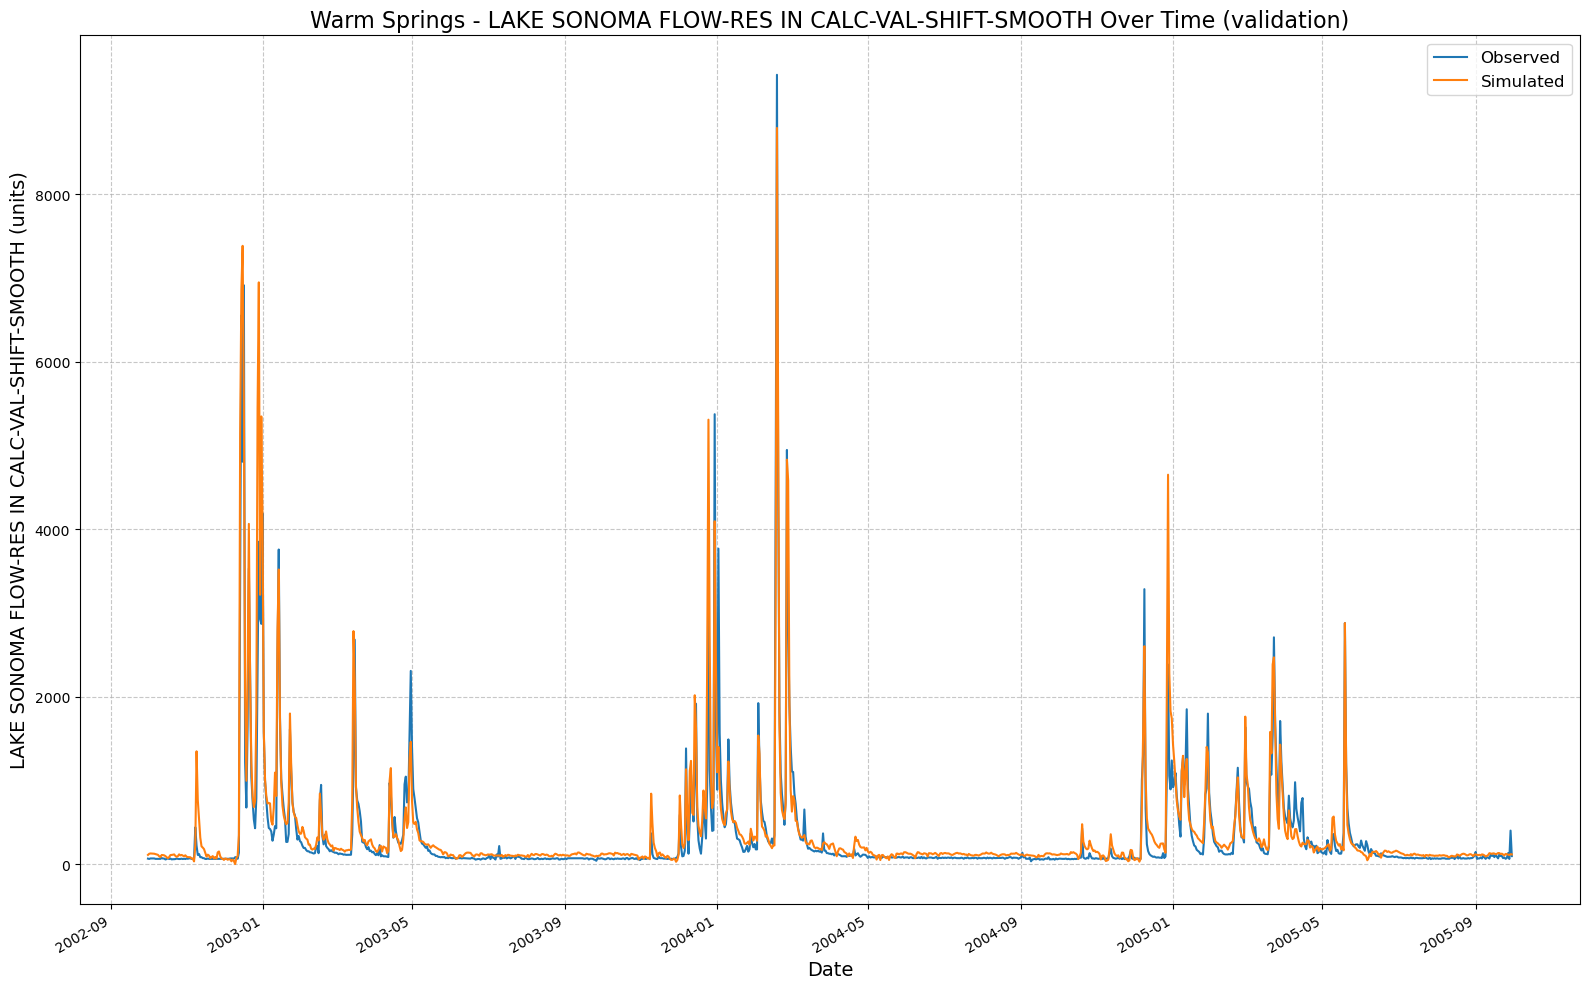

[INFO] CSV output saved at: F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1202_215042\results_output_validation.csv
NoPhysics metrics: {'NSE': 0.8314127624034882, 'MSE': 82661.4609375, 'RMSE': 287.5090623571716, 'KGE': 0.7932374589639075, 'Alpha-NSE': 1.0984741027893676, 'Beta-KGE': 1.1679781675338745, 'Beta-NSE': 0.0780793842403885, 'Pearson-r': 0.9304519253502122, 'FHV': 13.890588283538818, 'FMS': -23.09731660447735, 'FLV': -527.8272501459118, 'Peak-Timing': 0.2, 'Peak-MAPE': 16.976181268692017}
Approach: NoPhysics | Hyperparams: {'hidden_size': 128, 'seq_length': 90, 'num_layers': 1, 'epochs': 32, 'output_dropout': 0.4, 'save_weights_every': 32}
2025-02-12 21:51:10,349: Logging to F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1202_215110\output.log initialized.
2025-02-12 21:51:10,349: ### Folder structure created at F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1202_215110
2025-02-12 21:

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


2025-02-12 21:51:10,399: output_dropout: 0.4
2025-02-12 21:51:10,402: num_layers: 1
2025-02-12 21:51:10,404: dev_mode: True
2025-02-12 21:51:10,406: optimizer: Adam
2025-02-12 21:51:10,407: loss: NSE
2025-02-12 21:51:10,409: learning_rate: {0: 0.01, 20: 0.005, 30: 0.001}
2025-02-12 21:51:10,410: batch_size: 256
2025-02-12 21:51:10,412: epochs: 32
2025-02-12 21:51:10,413: clip_gradient_norm: 1
2025-02-12 21:51:10,415: predict_last_n: 1
2025-02-12 21:51:10,416: seq_length: 90
2025-02-12 21:51:10,417: log_interval: 16
2025-02-12 21:51:10,419: log_tensorboard: True
2025-02-12 21:51:10,423: log_n_figures: 1
2025-02-12 21:51:10,424: save_weights_every: 32
2025-02-12 21:51:10,426: dataset: russian_river
2025-02-12 21:51:10,427: data_dir: F:\Dino\UCB-USACE-LSTMs\russian_river_data
2025-02-12 21:51:10,429: dynamic_inputs: ['DRY CREEK 20 PRECIP-INC SCREENED', 'DRY CREEK 20 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR', 'DRY CREEK 30 PRECIP-INC SCREENED', 'DRY CREEK 30 ET-POTENTIAL RUN:BASIN AVERAGE 60 Y

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature

# Validation: 100%|██████████| 1/1 [00:00<00:00,  1.96it/s]
2025-02-12 21:52:12,457: Stored metrics at F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1202_215110\validation\model_epoch032\validation_metrics.csv
2025-02-12 21:52:12,461: Stored results at F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1202_215110\validation\model_epoch032\validation_results.p
got predictions


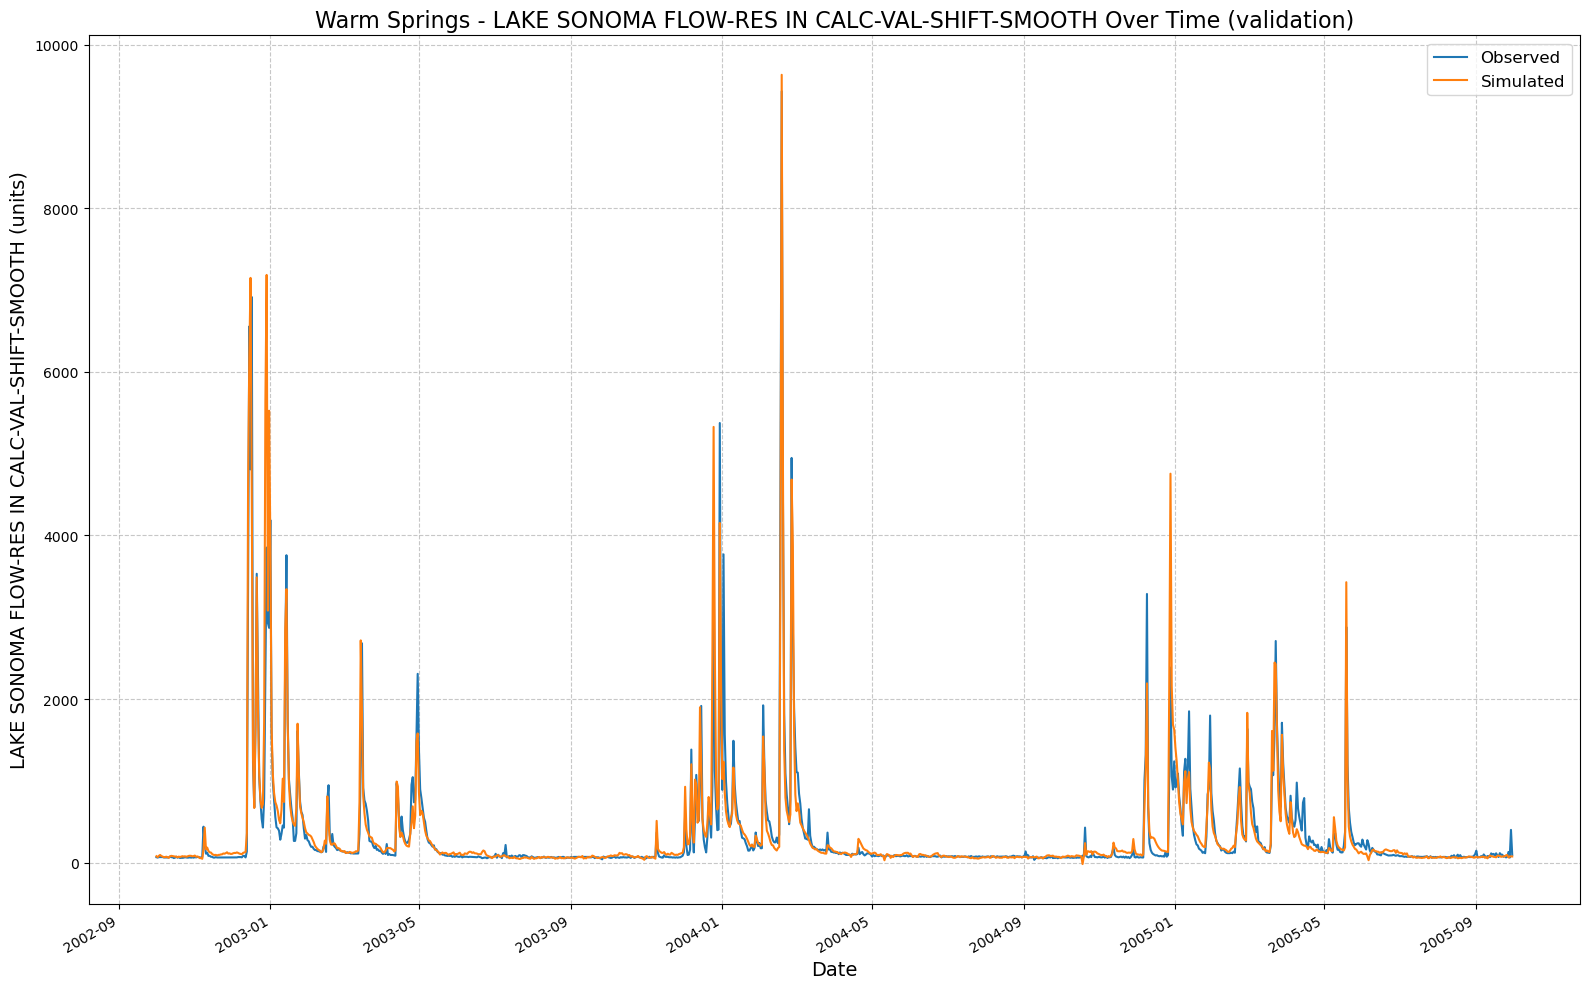

[INFO] CSV output saved at: F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1202_215110\results_output_validation.csv
NoPhysics metrics: {'NSE': 0.8348418772220612, 'MSE': 80980.1015625, 'RMSE': 284.57002927662637, 'KGE': 0.8854411571813099, 'Alpha-NSE': 1.0783871629350426, 'Beta-KGE': 1.0395797491073608, 'Beta-NSE': 0.018397425711453856, 'Pearson-r': 0.9264294582353045, 'FHV': 11.37765347957611, 'FMS': -7.662532490225598, 'FLV': -2785.9482156133017, 'Peak-Timing': 0.2, 'Peak-MAPE': 24.16264533996582}
Approach: NoPhysics | Hyperparams: {'hidden_size': 128, 'seq_length': 90, 'num_layers': 2, 'epochs': 16, 'output_dropout': 0.4, 'save_weights_every': 16}
2025-02-12 21:52:13,201: Logging to F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1202_215213\output.log initialized.
2025-02-12 21:52:13,201: ### Folder structure created at F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1202_215213
2025-02-12 2

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.99it/s]
2025-02-12 21:52:13,585: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 200.79it/s]
2025-02-12 21:52:13,613: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 12/12 [00:01<00:00,  6.73it/s, Loss: 0.0000]
2025-02-12 21:52:15,731: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 12/12 [00:01<00:00,  7.02it/s, Loss: 0.0000]
2025-02-12 21:52:17,447: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 12/12 [00:01<00:00,  7.23it/s, Loss: 0.0000]
2025-02-12 21:52:19,113: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 12/12 [00:01<00:00,  6.94it/s, Loss: 0.0000]
2025-02-12 21:52:20,849: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 12/12 [00:01<00:00,  6.77it/s, Loss: 0.0000]
2025-02-12 21:52:22,629: Epoch 5 averag

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature

# Validation: 100%|██████████| 1/1 [00:00<00:00,  1.54it/s]
2025-02-12 21:52:43,718: Stored metrics at F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1202_215213\validation\model_epoch016\validation_metrics.csv
2025-02-12 21:52:43,721: Stored results at F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1202_215213\validation\model_epoch016\validation_results.p
got predictions


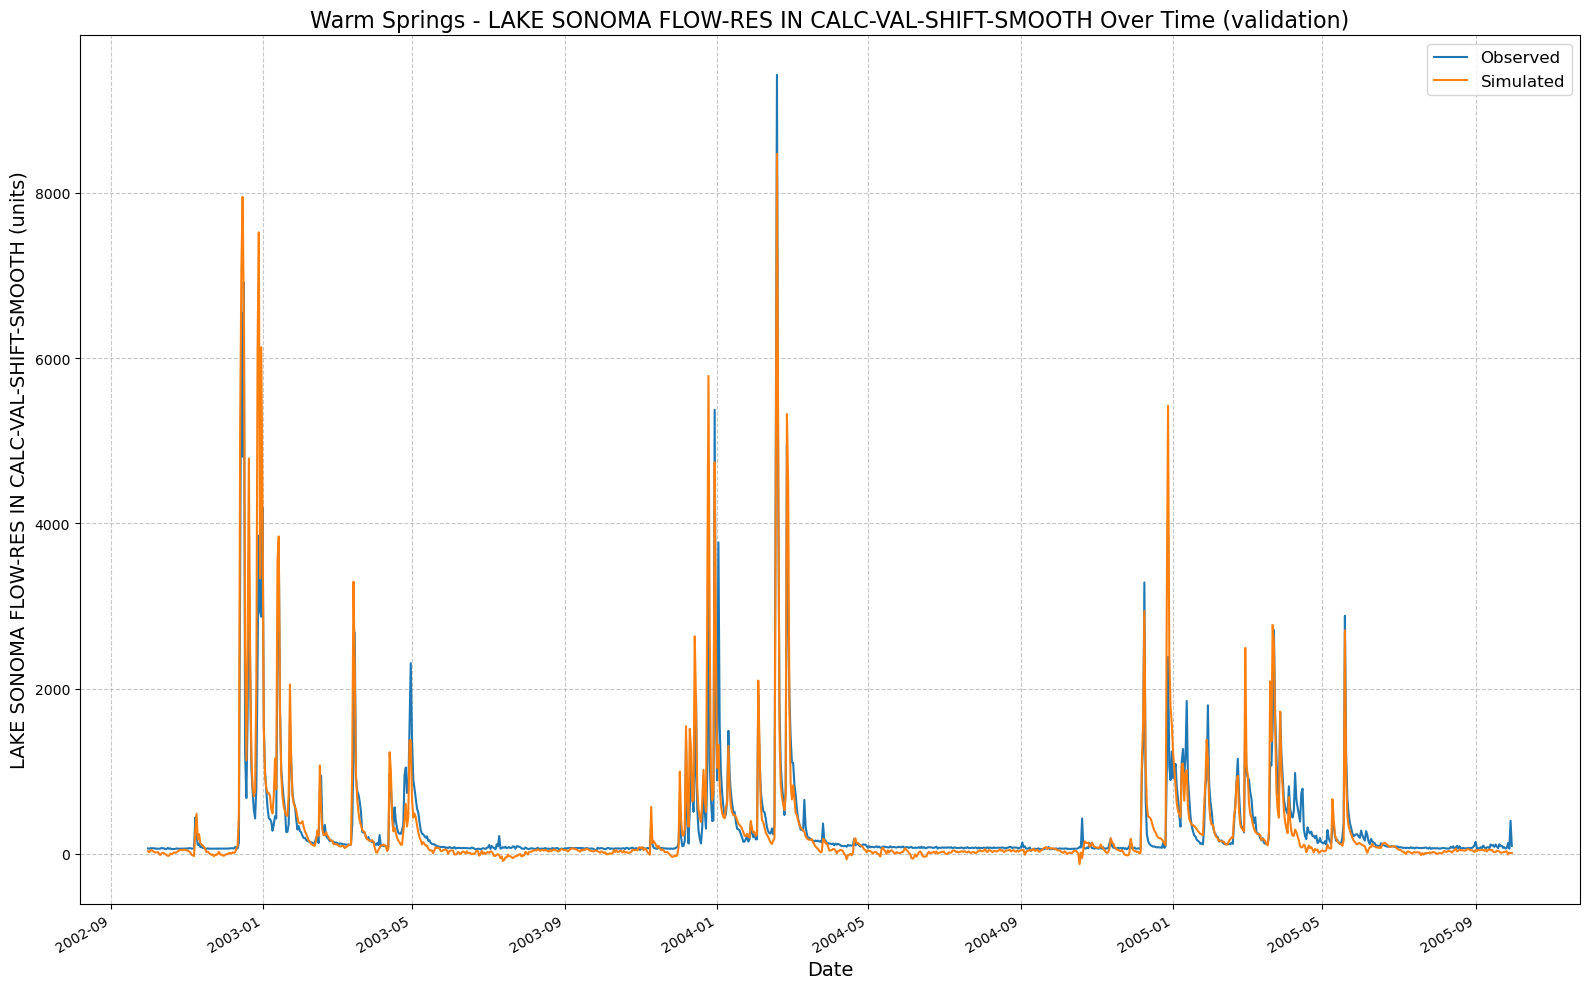

[INFO] CSV output saved at: F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1202_215213\results_output_validation.csv
NoPhysics metrics: {'NSE': 0.7636185586452484, 'MSE': 115902.21875, 'RMSE': 340.44414923743363, 'KGE': 0.7743487114573874, 'Alpha-NSE': 1.2112151557864879, 'Beta-KGE': 0.9936530590057373, 'Beta-NSE': -0.0029501777681276726, 'Pearson-r': 0.9208395406339349, 'FHV': 23.607046902179718, 'FMS': 51.49109955888611, 'FLV': -1781.8088570896925, 'Peak-Timing': 0.4, 'Peak-MAPE': 14.689694643020628}
Approach: NoPhysics | Hyperparams: {'hidden_size': 128, 'seq_length': 90, 'num_layers': 2, 'epochs': 32, 'output_dropout': 0.4, 'save_weights_every': 32}
2025-02-12 21:52:44,512: Logging to F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1202_215244\output.log initialized.
2025-02-12 21:52:44,512: ### Folder structure created at F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1202_215244
2025-02-12

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.80it/s]
2025-02-12 21:52:44,887: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 502.19it/s]
2025-02-12 21:52:44,897: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 12/12 [00:01<00:00,  7.83it/s, Loss: 0.0000]
2025-02-12 21:52:46,702: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 12/12 [00:01<00:00,  8.08it/s, Loss: 0.0000]
2025-02-12 21:52:48,195: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 12/12 [00:01<00:00,  8.63it/s, Loss: 0.0000]
2025-02-12 21:52:49,592: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 12/12 [00:01<00:00,  8.19it/s, Loss: 0.0000]
2025-02-12 21:52:51,061: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 12/12 [00:01<00:00,  8.11it/s, Loss: 0.0000]
2025-02-12 21:52:52,547: Epoch 5 averag

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature

# Validation: 100%|██████████| 1/1 [00:00<00:00,  1.35it/s]
2025-02-12 21:53:34,469: Stored metrics at F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1202_215244\validation\model_epoch032\validation_metrics.csv
2025-02-12 21:53:34,471: Stored results at F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1202_215244\validation\model_epoch032\validation_results.p
got predictions


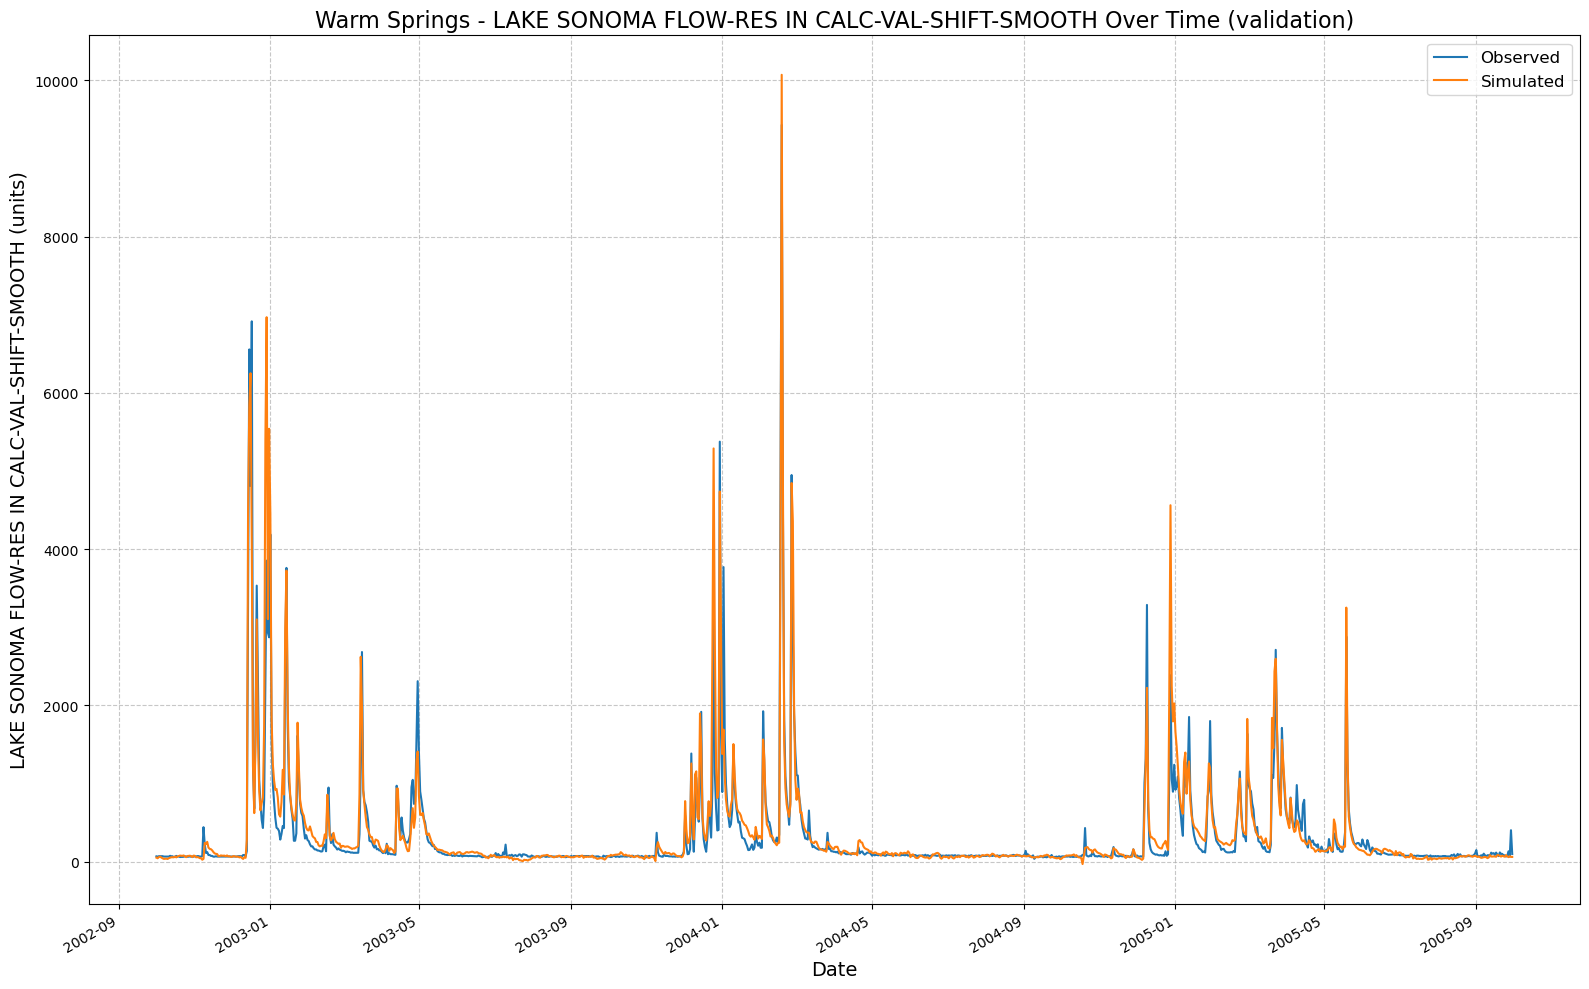

[INFO] CSV output saved at: F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1202_215244\results_output_validation.csv
NoPhysics metrics: {'NSE': 0.8384675085544586, 'MSE': 79202.390625, 'RMSE': 281.4291929153761, 'KGE': 0.838667334295032, 'Alpha-NSE': 1.0996442894151761, 'Beta-KGE': 1.1072473526000977, 'Beta-NSE': 0.04985056041261696, 'Pearson-r': 0.932196976684768, 'FHV': 11.486801505088806, 'FMS': 9.710862811079311, 'FLV': -2744.920022180463, 'Peak-Timing': 0.2, 'Peak-MAPE': 26.48836851119995}
Approach: NoPhysics | Hyperparams: {'hidden_size': 128, 'seq_length': 180, 'num_layers': 1, 'epochs': 16, 'output_dropout': 0.4, 'save_weights_every': 16}
2025-02-12 21:53:35,198: Logging to F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1202_215335\output.log initialized.
2025-02-12 21:53:35,198: ### Folder structure created at F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1202_215335
2025-02-12 21:53:

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  2.75it/s]
2025-02-12 21:53:35,681: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 250.98it/s]
2025-02-12 21:53:35,700: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:03<00:00,  2.83it/s, Loss: 0.0000]
2025-02-12 21:53:39,936: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:03<00:00,  2.89it/s, Loss: 0.0000]
2025-02-12 21:53:43,752: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:03<00:00,  2.93it/s, Loss: 0.0000]
2025-02-12 21:53:47,528: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:03<00:00,  2.76it/s, Loss: 0.0000]
2025-02-12 21:53:51,512: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:03<00:00,  2.87it/s, Loss: 0.0000]
2025-02-12 21:53:55,370: Epoch 5 averag

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature

# Validation: 100%|██████████| 1/1 [00:00<00:00,  1.53it/s]
2025-02-12 21:54:42,462: Stored metrics at F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1202_215335\validation\model_epoch016\validation_metrics.csv
2025-02-12 21:54:42,465: Stored results at F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1202_215335\validation\model_epoch016\validation_results.p
got predictions


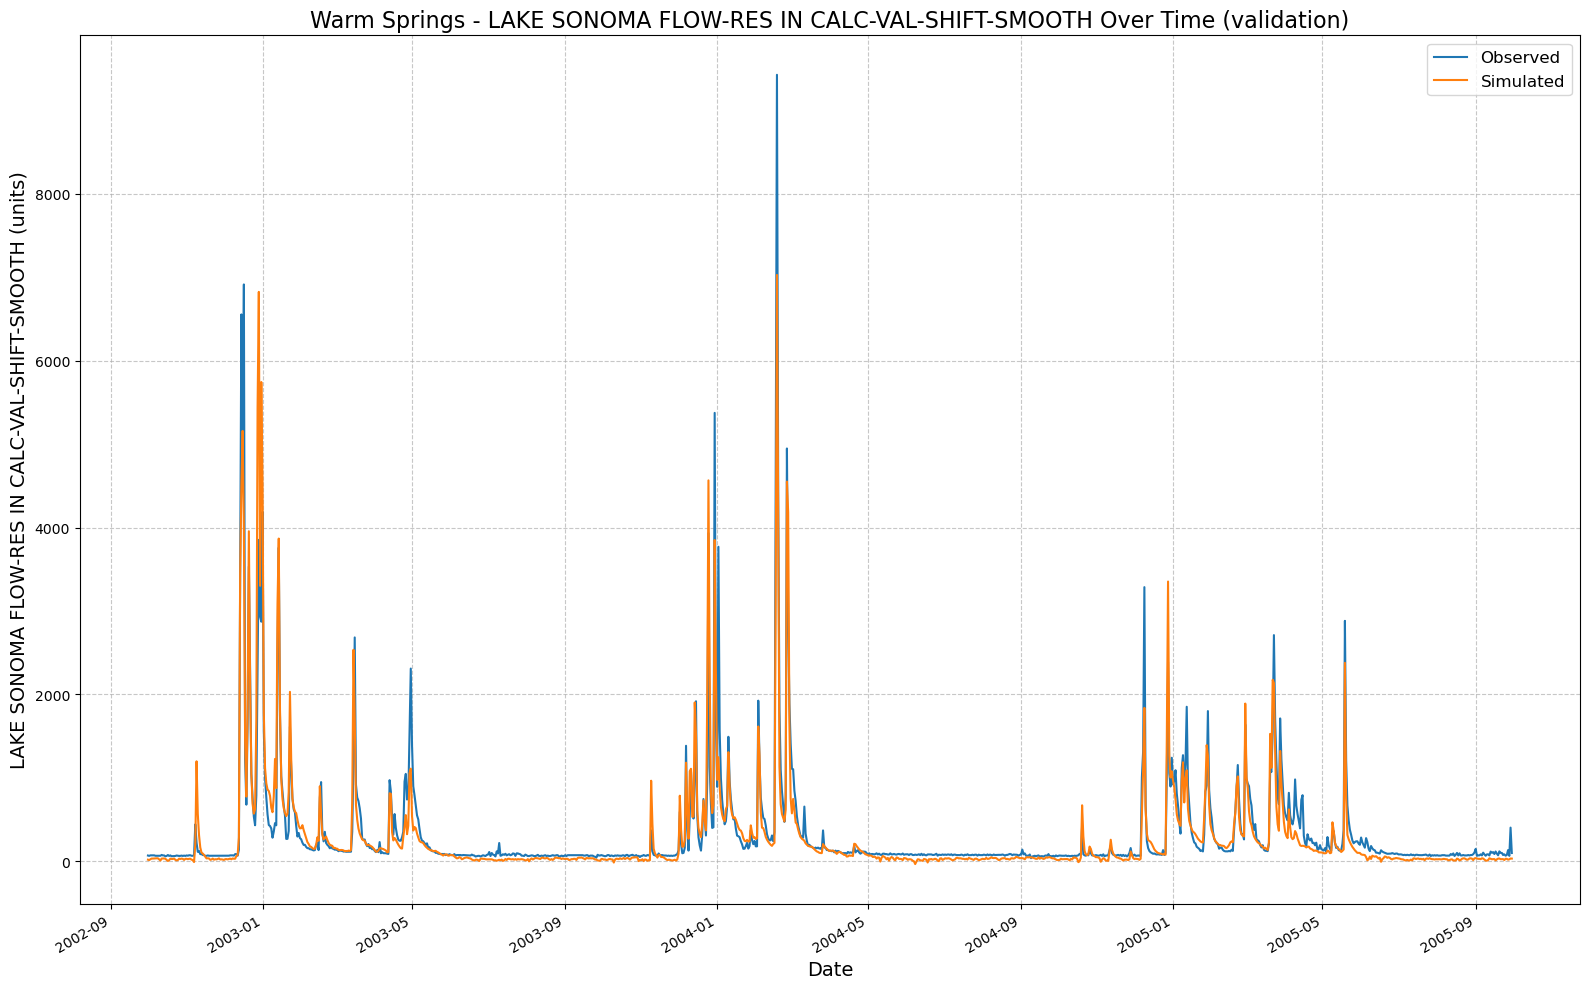

[INFO] CSV output saved at: F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1202_215335\results_output_validation.csv
NoPhysics metrics: {'NSE': 0.8294021487236023, 'MSE': 83647.296875, 'RMSE': 289.21842416243123, 'KGE': 0.859044592182838, 'Alpha-NSE': 0.9743584871304313, 'Beta-KGE': 0.8912198543548584, 'Beta-NSE': -0.050563044992085006, 'Pearson-r': 0.9141057643139892, 'FHV': -0.2779386006295681, 'FMS': 54.4060461582845, 'FLV': -2470.666538204563, 'Peak-Timing': 0.2, 'Peak-MAPE': 36.26993417739868}
Approach: NoPhysics | Hyperparams: {'hidden_size': 128, 'seq_length': 180, 'num_layers': 1, 'epochs': 32, 'output_dropout': 0.4, 'save_weights_every': 32}
2025-02-12 21:54:43,337: Logging to F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1202_215443\output.log initialized.
2025-02-12 21:54:43,340: ### Folder structure created at F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\runs\testing_run_1202_215443
2025-02-12 21

F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
F:\Dino\UCB-USACE-LSTMs\UCB_training\models\warm_springs_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  2.63it/s]
2025-02-12 21:54:43,840: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 167.44it/s]
2025-02-12 21:54:43,866: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:03<00:00,  2.77it/s, Loss: 0.0000]
2025-02-12 21:54:48,283: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:03<00:00,  2.85it/s, Loss: 0.0000]
2025-02-12 21:54:52,154: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:03<00:00,  2.78it/s, Loss: 0.0000]
2025-02-12 21:54:56,114: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:03<00:00,  2.83it/s, Loss: 0.0000]
2025-02-12 21:55:00,013: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:03<00:00,  2.83it/s, Loss: 0.0000]
2025-02-12 21:55:03,903: Epoch 5 averag

In [ ]:
for approach in approaches:
    for (hs, seq, nl, ep) in itertools.product(
            hyperparam_space["hidden_size"],
            hyperparam_space["seq_length"],
            hyperparam_space["num_layers"],
            hyperparam_space["epochs"]
    ):
        current_hparams = {
            "hidden_size": hs,
            "seq_length": seq,
            "num_layers": nl,
            "epochs": ep,
            "output_dropout": fixed_dropout,
            "save_weights_every": ep
        }
        print(f"Approach: {approach['name']} | Hyperparams: {current_hparams}")
        trainer = UCB_trainer(
            path_to_csv_folder=path_to_csv,
            yaml_path=path_to_yaml,
            hyperparams=current_hparams,
            input_features=approach["input_features"],
            physics_informed=approach["physics_informed"],
            physics_data_file=approach["physics_data_file"],
            hourly=False,
            extend_train_period=False,
            gpu=-1
        )
        trainer.train()
        csv_path, metrics_dict = trainer.results()
        row_data = {
            "model_type": approach["name"],
            "hidden_size": hs,
            "seq_length": seq,
            "num_layers": nl,
            "epochs": ep,
            "output_dropout": fixed_dropout
        }
        for k, v in metrics_dict.items():
            row_data[k] = v
        search_results.append(row_data)
        print(f"{approach['name']} metrics: {metrics_dict}")

In [ ]:
df_results = pd.DataFrame(search_results)
df_results.sort_values(by="NSE", ascending=False, inplace=True)
df_results.reset_index(drop=True, inplace=True)
df_results